# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


### (1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.  

In [23]:
import numpy as np
import pandas as pd
import sklearn
print(np.__version__) # numpy version 1.22.3
print(pd.__version__) # pands version 1.4.2
print(sklearn.__version__) # sklearn version 1.0.2

1.22.3
1.4.2
1.0.2


In [114]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #mse 모듈을 사용하기 위해 불러옴
import matplotlib.pyplot as plt #그래프 기능을 사용하기 위해 불러옴 (8번용))

In [29]:
diabetes = load_diabetes()

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [30]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [35]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [82]:
df_X = diabetes.data
print(df_X.shape) # 442 10
print(type(df_X)) # numpy.ndarray
df_X[0]

(442, 10)
<class 'numpy.ndarray'>


array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [80]:
df_y = diabetes.target
print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [71]:
#diabetes.target_filename # diabetes_target.csv.gz
#diabetes.feature_names #['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [74]:
diabetes_df =pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df #442rows x 10 columns

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [76]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [79]:
diabetes_df["label"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### (2) 모델에 입력할 데이터 x 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [83]:
X = np.array(df_X)

### (3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [86]:
y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 10개의 정보(feature)가 있는 데이터

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
모델 함수를 구현해주세요.

In [98]:
#numpy 필요
W = np.random.rand(10)
b = np.random.rand()

In [99]:
W

array([0.54840549, 0.56625831, 0.09331933, 0.91005132, 0.13922334,
       0.44952678, 0.53818316, 0.42169285, 0.59861982, 0.68126721])

In [100]:
b

0.7657070409005813

In [101]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


In [93]:
# 라이브러리를 통해 LinearRegression() 사용하면 쉽게 구할 수 있지만 여기서는 직접 모델 작성
# 아래코드는 값 비교를 위함
# model = LinearRegression()

In [94]:
# model.fit(X_train, y_train)

LinearRegression()

In [103]:
#X_Test 데이터에 대한 예측
#predictions = model.predict(X_test)
#predictions
'''
array([ 88.86167656, 143.64965715, 118.01362639, 222.48223831,
       155.04818784, 180.02353898,  60.71476863, 109.42475842,
        54.81913441, 170.1735393 , 145.66680794, 216.83951257,
       192.04124427, 215.01205319, 157.64040914, 145.44312022,
       140.46657677, 194.7093827 ,  32.3035521 , 144.14593173,
       234.33917676, 119.85502937, 237.07602669, 211.1782068 ,
       170.1317157 , 196.75711733, 259.59548704, 124.55870903,
       196.11704783, 157.21930498, 209.21800391, 216.1124694 ,
       195.2428691 , 174.82681382, 174.58311375, 163.91319968,
       101.86966371,  68.94481152, 248.66211205, 225.63835495,
       120.35877865, 170.64509824, 137.81796963, 280.54197643,
       159.70208972, 146.22998504, 159.09285627, 176.42883387,
       106.03844555, 108.48537627,  80.275797  , 151.58479715,
       170.68548974, 161.24454075,  67.23144493,  91.20266974,
       159.64991456,  92.20231986, 147.17501174,  60.72945102,
        72.26686055, 126.62164711, 129.34054352, 102.6480631 ,
       148.66190221, 106.13123839,  72.56301649, 206.25266798,
       179.50889725, 100.64112462, 116.16508732, 203.37770139,
       174.18698482,  52.29676399, 180.72123872, 108.48401625,
       296.47275883, 177.97540185, 260.61354507, 290.49885186,
       200.54312541, 111.96761776, 177.32212665, 192.6793567 ,
       128.24225868,  77.63860173, 121.38690932, 116.80185063,
       101.74203983])
'''

'\narray([ 88.86167656, 143.64965715, 118.01362639, 222.48223831,\n       155.04818784, 180.02353898,  60.71476863, 109.42475842,\n        54.81913441, 170.1735393 , 145.66680794, 216.83951257,\n       192.04124427, 215.01205319, 157.64040914, 145.44312022,\n       140.46657677, 194.7093827 ,  32.3035521 , 144.14593173,\n       234.33917676, 119.85502937, 237.07602669, 211.1782068 ,\n       170.1317157 , 196.75711733, 259.59548704, 124.55870903,\n       196.11704783, 157.21930498, 209.21800391, 216.1124694 ,\n       195.2428691 , 174.82681382, 174.58311375, 163.91319968,\n       101.86966371,  68.94481152, 248.66211205, 225.63835495,\n       120.35877865, 170.64509824, 137.81796963, 280.54197643,\n       159.70208972, 146.22998504, 159.09285627, 176.42883387,\n       106.03844555, 108.48537627,  80.275797  , 151.58479715,\n       170.68548974, 161.24454075,  67.23144493,  91.20266974,\n       159.64991456,  92.20231986, 147.17501174,  60.72945102,\n        72.26686055, 126.62164711, 12

### (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.


In [107]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [108]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [125]:
# 라이브러리를 사용하면 쉽게 구할 수 있지만 여기서는 def(함수)를 직접 구현
# 아래는 직접만든 값비교를 위해 작성
# mse함수는 sklearn.metrics의 mean_squared_error에 들어있음
mse = mean_squared_error(y_test, predictions)
mse #2966.0402992842164

2966.0402992842164

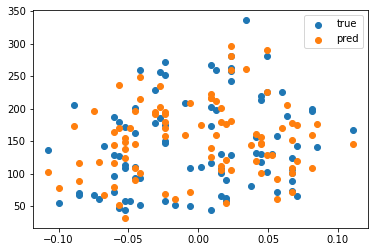

In [126]:
#시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

### (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.


In [109]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
    

In [111]:
# gradient 계산
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

'''
dW: [ -60.53317007  -13.7179316  -189.63390588 -142.56862429  -68.30374602
  -56.05098535  127.68260888 -139.05192987 -182.86590269 -123.47677324]
db: -302.73555424399063
'''

dW: [ -60.53317007  -13.7179316  -189.63390588 -142.56862429  -68.30374602
  -56.05098535  127.68260888 -139.05192987 -182.86590269 -123.47677324]
db: -302.73555424399063


'\ndW: [ -60.53317007  -13.7179316  -189.63390588 -142.56862429  -68.30374602\n  -56.05098535  127.68260888 -139.05192987 -182.86590269 -123.47677324]\ndb: -302.73555424399063\n'

### (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요  
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [112]:
# 학습률 0.0001
LEARNNING_RATE = 0.0001

### (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.  

In [113]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNNING_RATE * dW
    b -= LEARNNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29554.9820
Iteration 20 : Loss 29458.3926
Iteration 30 : Loss 29362.1807
Iteration 40 : Loss 29266.3448
Iteration 50 : Loss 29170.8833
Iteration 60 : Loss 29075.7949
Iteration 70 : Loss 28981.0780
Iteration 80 : Loss 28886.7311
Iteration 90 : Loss 28792.7529
Iteration 100 : Loss 28699.1417
Iteration 110 : Loss 28605.8962
Iteration 120 : Loss 28513.0150
Iteration 130 : Loss 28420.4965
Iteration 140 : Loss 28328.3393
Iteration 150 : Loss 28236.5420
Iteration 160 : Loss 28145.1032
Iteration 170 : Loss 28054.0214
Iteration 180 : Loss 27963.2953
Iteration 190 : Loss 27872.9234
Iteration 200 : Loss 27782.9042
Iteration 210 : Loss 27693.2365
Iteration 220 : Loss 27603.9189
Iteration 230 : Loss 27514.9498
Iteration 240 : Loss 27426.3280
Iteration 250 : Loss 27338.0521
Iteration 260 : Loss 27250.1207
Iteration 270 : Loss 27162.5324
Iteration 280 : Loss 27075.2858
Iteration 290 : Loss 26988.3797
Iteration 300 : Loss 26901.8127
Iteration 310 : Loss 26815.5833
Iteration 320 : L

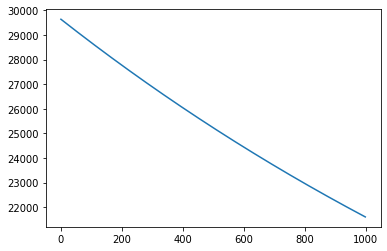

In [115]:
# plt는 matplotlib.pyplot에 단축어 그래프를 사용하기 위해 선언
plt.plot(losses)
plt.show()



In [116]:
W, b

(array([  5.34114493,   1.61027035,  15.25231029,  12.22790324,
          5.71808212,   5.43390338, -10.63387759,  12.5081046 ,
         15.52384759,  10.53461268]),
 28.560901594399503)

### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [120]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse #18166.128306355356

18166.128306355356

### (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

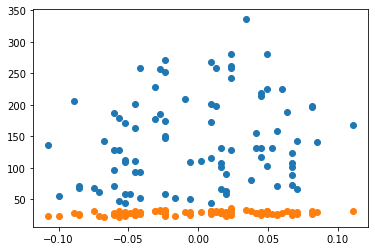

In [127]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()